<a href="https://colab.research.google.com/github/MySureStart/mit-futuremakers-summer-2024-faefey/blob/main/Module_07_Regression_Loss_Functions/Regression_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

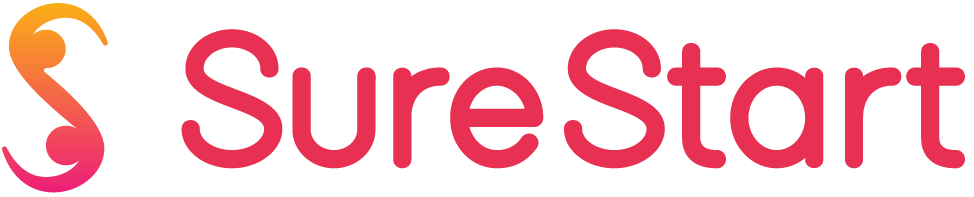

# Objective
* To introduce you to loss functions.


# Loss Functions

Loss functions define what a good prediction is and isn’t. Choosing the right loss function dictates how well your estimator (machine learning model) will be. The criteria by which an estimator is scrutinized is its performance - how accurate the model's decisions are. This calls for a way to measure how far a particular iteration of the model is from the actual values. This is where loss functions come into play.

Loss functions measure how far an estimated value is from its true value. A loss function maps decisions to their associated costs. Loss functions are not fixed, they change depending on the task in hand and the goal to be met.

Worth to note we can speak of different kind of loss functions: **regression loss** functions and **classification loss** functions.

Regression loss function describes the difference between the values that a model is predicting and the actual values of the labels. So the loss function has a meaning on a labeled data when we compare the prediction to the label at a single point of time. This loss function is often called the error function or the error formula. Typical error functions we use for regression models are L1 and L2, Huber loss, Quantile loss, log cosh loss.

**Note**: L1 loss is also know as Mean Absolute Error. L2 Loss is also know as Mean Square Error or Quadratic loss.

Loss functions for classification represent the price paid for inaccuracy of predictions in classification problems (problems of identifying which category a particular observation belongs to). To name a few: log loss, focal loss, exponential loss, hinge loss, relative entropy loss and other.

*Note*: While more commonly used in regression, the square loss function can be re-written and utilized for classification.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Regression Losses

Remember, in regression, the output would be a real value. We need some loss functions which compares two real values.

In [ ]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

57026/57026 [==============================] - 0s 0us/step


## Mean Squared Error [MSE]

As the name suggests, Mean square error is measured as the average of squared difference between predictions and actual observations. It’s only concerned with the average magnitude of error irrespective of their direction.

However, due to squaring, predictions which are far away from actual values are penalized heavily in comparison to less deviated predictions. Plus MSE has nice mathematical properties which makes it easier to calculate gradients.

Let's assume there are $n$ data samples, for $i^{th}$ sample; the actual output is $y_i$ and $\hat{y}_i$ is the estimated output from the regression model.

We first square the difference between the original and estimated output with $(y_i - \hat{y}_i)^2$. Then we take sum of the squared difference for all the samples. And finally divide it by the total count of samples, which is $n$.

$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}$$

In [ ]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 6s 87ms/step - loss: 574.0685 - mse: 574.0685 - val_loss: 457.0085 - val_mse: 457.0085
Epoch 2/250
12/12 [==============================] - 0s 35ms/step - loss: 510.6386 - mse: 510.6386 - val_loss: 379.3323 - val_mse: 379.3323
Epoch 3/250
12/12 [==============================] - 0s 24ms/step - loss: 405.8719 - mse: 405.8719 - val_loss: 257.9897 - val_mse: 257.9897
Epoch 4/250
12/12 [==============================] - 0s 13ms/step - loss: 254.0905 - mse: 254.0905 - val_loss: 116.5490 - val_mse: 116.5490
Epoch 5/250
12/12 [==============================] - 0s 10ms/step - loss: 118.7070 - mse: 118.7070 - val_loss: 64.8511 - val_mse: 64.8511
Epoch 6/250
12/12 [==============================] - 0s 16ms/step - loss: 80.3977 - mse: 80.3977 - val_loss: 52.6930 - val_mse: 52.6930
Epoch 7/250
12/12 [==============================] - 0s 13ms/step - loss: 57.4485 - mse: 57.4485 - val_loss: 30.9801 - val_mse: 30.9801
Epoch 8/250
12/12 [===========

## Question 1

Now that you know how MSE works, you need to plot the behavior of **square** component of MSE loss for the synthetic errors given.

### Answer 1

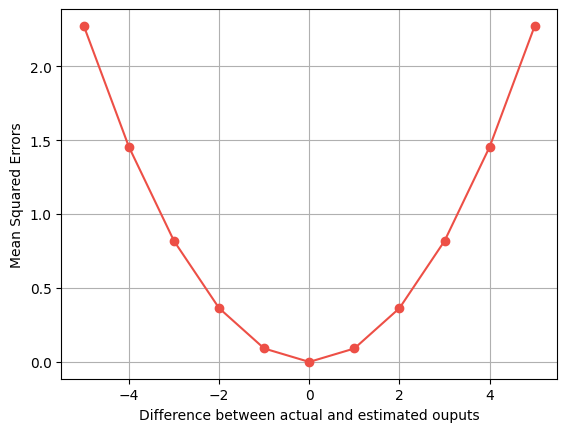

In [ ]:
errors = np.arange(-5, 6)
n = len(errors)

mse = errors**2 / n

plt.plot(errors, mse, c='#ED4F46', marker='o')
plt.grid()
plt.xlabel('Difference between actual and estimated ouputs')
plt.ylabel('Mean Squared Errors')
plt.show()

## Mean Absolute Error [MAE]

Mean absolute error, on the other hand, is measured as the average of sum of absolute differences between predictions and actual observations.

Like MSE, this as well measures the magnitude of error without considering their direction.

Unlike MSE, MAE needs more complicated tools such as linear programming to compute the gradients. Plus MAE is more robust to outliers since it does not make use of square.

Let's assume there are $n$ data samples, for $i^{th}$ sample; the actual output is $y_i$ and $\hat{y}_i$ is the estimated output from the regression model.

We first take the absolute difference between the original and estimated output with $|y_i - \hat{y}_i|2$. Then we take sum of the absolute differences for all the samples. And finally divide it by the total count of samples, which is $n$.

$$MAE = \frac{\sum_{i=1}^{n}|y_i - \hat{y}_i|}{n}$$

In [ ]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 1s 23ms/step - loss: 21.9319 - mae: 21.9319 - val_loss: 20.3889 - val_mae: 20.3889
Epoch 2/250
12/12 [==============================] - 0s 5ms/step - loss: 20.6772 - mae: 20.6772 - val_loss: 18.6118 - val_mae: 18.6118
Epoch 3/250
12/12 [==============================] - 0s 7ms/step - loss: 18.2145 - mae: 18.2145 - val_loss: 15.1229 - val_mae: 15.1229
Epoch 4/250
12/12 [==============================] - 0s 7ms/step - loss: 13.6338 - mae: 13.6338 - val_loss: 9.5275 - val_mae: 9.5275
Epoch 5/250
12/12 [==============================] - 0s 6ms/step - loss: 8.2588 - mae: 8.2588 - val_loss: 6.2054 - val_mae: 6.2054
Epoch 6/250
12/12 [==============================] - 0s 7ms/step - loss: 6.1914 - mae: 6.1914 - val_loss: 5.0819 - val_mae: 5.0819
Epoch 7/250
12/12 [==============================] - 0s 7ms/step - loss: 4.5666 - mae: 4.5666 - val_loss: 3.9247 - val_mae: 3.9247
Epoch 8/250
12/12 [==============================] - 0s 6ms/step - l

## Question 2

Now that you know how MAE works, you need to plot the behavior of the **absolute** component of MAE for the synthetic errors given.

### Answer 2

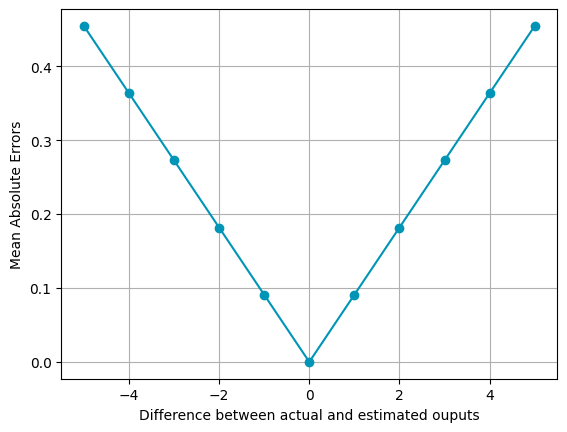

In [ ]:
errors = np.arange(-5, 6)
n = len(errors)

mae = abs(errors) / n

plt.plot(errors, mae, c='#0095B6', marker='o')
plt.grid()
plt.xlabel('Difference between actual and estimated ouputs')
plt.ylabel('Mean Absolute Errors')
plt.show()

## Mean Squared Logarithmic Error [MSLE]

MSLE is just like MSE, but we have to take $log$ of the actual and estimated outputs before squaring and averaging.

The introduction of the logarithm makes MSLE only care about the relative difference between the true and the predicted value, or in other words, it only cares about the percentual difference between them.

This means that MSLE will treat small differences between small true and predicted values approximately the same as big differences between large true and predicted values.

We can use MSLE when we don't want large errors to be significantly more penalized than small ones, in those cases where the range of the target value is large.

*Example*: You want to predict future house prices, and your dataset includes homes that are orders of magnitude different in price. The price is a continuous value, and therefore, we want to do regression. MSLE can here be used as the loss function.

$$MSLE = \frac{\sum_{i=1}^{n}(\log(y_i+1) - \log(\hat{y}_i+1))^2}{n}$$

In [ ]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredLogarithmicError(),
              metrics=['mean_squared_logarithmic_error'])

model.fit(train_features, train_labels, epochs=150, validation_split = 0.1)

Epoch 1/150
12/12 [==============================] - 2s 29ms/step - loss: 7.3013 - mean_squared_logarithmic_error: 7.3013 - val_loss: 5.6127 - val_mean_squared_logarithmic_error: 5.6127
Epoch 2/150
12/12 [==============================] - 0s 8ms/step - loss: 4.6819 - mean_squared_logarithmic_error: 4.6819 - val_loss: 3.5043 - val_mean_squared_logarithmic_error: 3.5043
Epoch 3/150
12/12 [==============================] - 0s 7ms/step - loss: 2.7821 - mean_squared_logarithmic_error: 2.7821 - val_loss: 1.9196 - val_mean_squared_logarithmic_error: 1.9196
Epoch 4/150
12/12 [==============================] - 0s 9ms/step - loss: 1.5104 - mean_squared_logarithmic_error: 1.5104 - val_loss: 1.0156 - val_mean_squared_logarithmic_error: 1.0156
Epoch 5/150
12/12 [==============================] - 0s 6ms/step - loss: 0.8283 - mean_squared_logarithmic_error: 0.8283 - val_loss: 0.5600 - val_mean_squared_logarithmic_error: 0.5600
Epoch 6/150
12/12 [==============================] - 0s 10ms/step - loss: 

## Question 3

Now that you know how MSLE works, you need to plot the behavior of **squared log** component of MSLE for the synthetic errors given.

### Answer 3

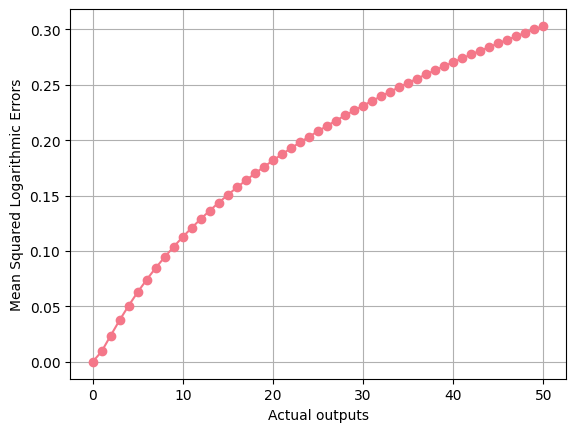

In [ ]:
actual_outputs = np.arange(0, 51)
n = len(actual_outputs)
estimated_outputs = np.zeros(n)

msle = (np.log(actual_outputs + 1) - np.log(estimated_outputs + 1))**2 / n

plt.plot(actual_outputs, msle, c='#F47789', marker='o')
plt.grid()
plt.xlabel('Actual outputs')
plt.ylabel('Mean Squared Logarithmic Errors')
plt.show()

## Question 4

Why do we add $1$ to the outputs before passing it through $\log()$?



### Answer 4

Without adding 1 to the actual and predicted values, taking the log of a value of 0 will be undefined. Taking the log of a value of 0 after adding 1 to it will give a value of 0.

## Question 5

Write your observations about MSE, MAE, and MSLE; and compare the results achieved with all 3 loss functions.


### Answer 5

With MSE, differences between actual and predicted values have a quadratic effect on the loss, so large errors affect the loss much more than small errors. With MAE, they have a linear effect on the loss, so the difference between the effects of large and small errors on the loss is not as drastic. MSLE is similar to MAE in this aspect, but instead has a logarithmic effect on the loss.

As for the results of the neural networks trained with each of the three loss functions, it is difficult to compare their performances using the loss function values, as the loss functions have different ranges of values for the same inputs. In the three neural networks, MSE starts with the highest loss values and ends with the highest loss values, with MAE coming second and MSLE coming third. This makes sense (and is true in the plots), as MSE squares all errors, MAE only takes the absolute value of errors, and MSLE involves logarithms.

## Question 6

Plug-in any of the loss functions from [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/losses) docs to the `model.compile` method and see the difference in model performance as compared to MSE, MAE, and MSLE.

In [ ]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam',
              loss=tf.keras.losses.Huber(),
              metrics=[tf.keras.losses.Huber()])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 1s 22ms/step - loss: 21.6120 - huber_loss: 21.3741 - val_loss: 20.1392 - val_huber_loss: 19.1022
Epoch 2/250
12/12 [==============================] - 0s 4ms/step - loss: 20.5873 - huber_loss: 20.4704 - val_loss: 18.7672 - val_huber_loss: 17.5940
Epoch 3/250
12/12 [==============================] - 0s 4ms/step - loss: 18.7350 - huber_loss: 18.6241 - val_loss: 16.0981 - val_huber_loss: 14.9066
Epoch 4/250
12/12 [==============================] - 0s 6ms/step - loss: 15.2101 - huber_loss: 15.1870 - val_loss: 11.5564 - val_huber_loss: 10.9150
Epoch 5/250
12/12 [==============================] - 0s 4ms/step - loss: 9.9189 - huber_loss: 9.6653 - val_loss: 6.0925 - val_huber_loss: 6.5356
Epoch 6/250
12/12 [==============================] - 0s 4ms/step - loss: 6.6194 - huber_loss: 6.6208 - val_loss: 5.1547 - val_huber_loss: 6.1698
Epoch 7/250
12/12 [==============================] - 0s 6ms/step - loss: 5.3103 - huber_loss: 5.2308 - val_loss: 

### Answer 6

In this neural network, Huber loss starts and ends with loss values very similar to that of MAE, with Huber loss having slightly lower loss values. The overall order in terms of having the highest loss values ends up being MSE, MAE, Huber loss, and MSLE.

# Upload this Colab Notebook to your Github repository. Also add your *reflections* on today's learning in README.md

#Fun Fact

Google Translate is getting better all the time, but it's still not perfect. Translate a sentence into another language and back into English, and you might get a hilarious surprise. That's what Malinda Kathleen Reese got when she reverse Google Translated the lyrics to "Let It Go" from Disney's Frozen into Chinese, Macedonian, French, Polish, Creole, Tamil and others. It doesn't come out as utter gibberish, but as a slightly off version with a slightly different message from the original. Which makes it even funnier. Plus, Malinda can really sing.

Link to video: https://www.youtube.com/watch?v=2bVAoVlFYf0

#References

https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23

https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/mean-squared-logarithmic-error-(msle)